- Завдання 1

In [13]:
import pandas as pd

In [14]:
#Читаємо таблицю
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
table = tables[2]

In [15]:
#Вивести перших 5 рядків.
print(table.head())

  Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022  


In [16]:
#Визначити розмір датасета.
print(f'Rows: {table.shape[0]}')
print(f'Columns: {table.shape[1]}')

Rows: 210
Columns: 7


In [17]:
#Визначити оптимальну кількість стовпців.
print(table.columns)

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )


In [18]:
#Змінити назви стовпців на більш зручні, наприклад Country MVF_2024 WorldBank_2023 OON_2022
table.columns = [
    ('Country', 'Country'),
    ('IMF', 'Forecast'),
    ('IMF', 'Year'),
    ('World Bank', 'Estimate'),
    ('World Bank', 'Year'),
    ('United Nations', 'Estimate'),
    ('United Nations', 'Year'),
]

print(table.head())

  (Country, Country) (IMF, Forecast) (IMF, Year) (World Bank, Estimate)  \
0              World       109529216        2024              105435540   
1      United States        28781083        2024               27360935   
2              China        18532633   [n 1]2024               17794782   
3            Germany         4591100        2024                4456081   
4              Japan         4110452        2024                4212945   

  (World Bank, Year) (United Nations, Estimate) (United Nations, Year)  
0               2023                  100834796                   2022  
1               2023                   25744100                   2022  
2          [n 3]2023                   17963170              [n 1]2022  
3               2023                    4076923                   2022  
4               2023                    4232173                   2022  


In [19]:
#Визначити тип даних.
print(table.dtypes)

(Country, Country)            object
(IMF, Forecast)               object
(IMF, Year)                   object
(World Bank, Estimate)        object
(World Bank, Year)            object
(United Nations, Estimate)    object
(United Nations, Year)        object
dtype: object


In [20]:
#Замініть у таблиці значення "—" на значення NaN. Перевірити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.
table = table.replace('—', pd.NA)
print(table.isnull().sum())

(Country, Country)             0
(IMF, Forecast)               15
(IMF, Year)                   15
(World Bank, Estimate)         8
(World Bank, Year)             8
(United Nations, Estimate)     1
(United Nations, Year)         1
dtype: int64


In [21]:
#Ще раз перевірити наявність пропущених значень.
print(table.isnull().sum())

(Country, Country)             0
(IMF, Forecast)               15
(IMF, Year)                   15
(World Bank, Estimate)         8
(World Bank, Year)             8
(United Nations, Estimate)     1
(United Nations, Year)         1
dtype: int64


In [22]:
#Перевірити наявність дублікатів. При наявності видалити дублікати.
table = table.drop_duplicates()
print(table.duplicated().sum())

0


In [23]:
#Вивести описову статистику датасету describe()
print(table.describe())

       (Country, Country) (IMF, Forecast) (IMF, Year) (World Bank, Estimate)  \
count                 210             195         195                    202   
unique                210             195          12                    202   
top                 World       109529216        2024              105435540   
freq                    1               1         182                      1   

       (World Bank, Year) (United Nations, Estimate) (United Nations, Year)  
count                 202                        209                    209  
unique                  9                        209                      9  
top                  2023                  100834796                   2022  
freq                  180                          1                    201  


In [24]:
#Визначте відхилення (різницю) між показниками MVF_2024 та WorldBank_2023 для кожної країни. У яких країнах ці показники найбільше відрізняються (дати відповідт)?
print(table[('IMF', 'Forecast')].sub(table[('World Bank', 'Estimate')]).abs().idxmax())

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [25]:
#Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та UN_2022. Які пари змінних мають найвищу кореляцію?
print(table[[('IMF', 'Forecast'), ('World Bank', 'Estimate'), ('United Nations', 'Estimate')]].corr())

TypeError: float() argument must be a string or a number, not 'NAType'

In [ ]:
#Обчисліть середнє значення для кожного стовпця (MVF_2024, WorldBank_2023, OON_2022). Як це середнє значення змінюється між роками?
print(table.groupby(level=1, axis=1).mean())

C:\Users\Димка\AppData\Local\Temp\ipykernel_15636\353282504.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  print(table.groupby(level=1, axis=1).mean())


ValueError: level > 0 or level < -1 only valid with MultiIndex

In [ ]:
#Обчисліть стандартне відхилення показників для кожної країни. Яка країна має найвищу варіативність у показниках між роками?
print(table.groupby(level=0, axis=0).std().idxmax())

C:\Users\Димка\AppData\Local\Temp\ipykernel_15636\2605825949.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  print(table.groupby(level=0, axis=0).std().idxmax())


ValueError: could not convert string to float: 'World'

In [ ]:
#Визначення країни з найвищим та найнижчим показниками: Знайдіть країну з найвищим та найнижчим показниками у кожному з років (MVF_2024, WorldBank_2023, OON_2022).
print(table.idxmax())
print(table.idxmin())

TypeError: '>' not supported between instances of 'float' and 'str'

Matplotlib is building the font cache; this may take a moment.


(IMF, Forecast)
109529216    1
12953        1
21662        1
21418        1
21371        1
            ..
108927       1
107933       1
104001       1
102328       1
66           1
Name: count, Length: 195, dtype: int64


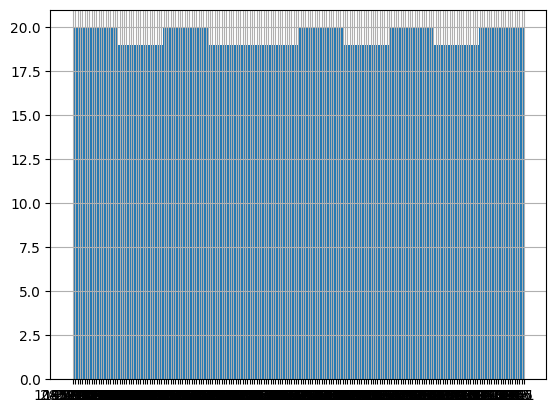

In [ ]:
#Побудуйте гістограму для розподілу показників MVF_2024 серед всіх країн. Який вигляд має розподіл? Чи є країни, що виділяються?
table[('IMF', 'Forecast')].hist()
print(table[('IMF', 'Forecast')].value_counts())

In [ ]:
#Розрахуйте частку кожної країни в загальному значенні для кожного року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки країн з часом (дати відповідь)?
print(table.groupby(level=1, axis=1).apply(lambda x: x / x.sum()))

C:\Users\bmaru\AppData\Local\Temp\ipykernel_19700\4086243377.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  print(table.groupby(level=1, axis=1).apply(lambda x: x / x.sum()))


ValueError: level > 0 or level < -1 only valid with MultiIndex

In [ ]:
#Візуалізуйте зміни в показниках для кожної країни за три роки на графіку. Які країни показують стабільне зростання або спад (дати відповідь)?
table.groupby(level=0, axis=0).plot()
print(table.groupby(level=0, axis=0).apply(lambda x: x.diff().mean()))

C:\Users\Димка\AppData\Local\Temp\ipykernel_15636\491200689.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  table.groupby(level=0, axis=0).plot()


TypeError: no numeric data to plot

In [ ]:
#Висновок

#В цьому завданні було здійснено попередній аналіз даних ВВП за країнами. Очищено дані, проведено розрахунки та візуалізацію.
#Виявлено кореляції, відхилення, середні значення, частки країн, країни з найвищими/найнижчими показниками та їх динаміку.

- Завдання 2

In [ ]:
#Завантажити датасет Титанік з Kaggle (або використовуйте вже завантажений файл titanic.csv) Виконати попередній аналіз даних.

#Читаємо таблицю
file = 'titanic.csv'
table = pd.read_csv(file)

In [ ]:
#Вивести перших 5 рядків.
print(table.head())

  (Country, Country) (IMF, Forecast) (IMF, Year) (World Bank, Estimate)  \
0              World       109529216        2024              105435540   
1      United States        28781083        2024               27360935   
2              China        18532633   [n 1]2024               17794782   
3            Germany         4591100        2024                4456081   
4              Japan         4110452        2024                4212945   

  (World Bank, Year) (United Nations, Estimate) (United Nations, Year)  
0               2023                  100834796                   2022  
1               2023                   25744100                   2022  
2          [n 3]2023                   17963170              [n 1]2022  
3               2023                    4076923                   2022  
4               2023                    4232173                   2022  


In [ ]:
#Визначити розмір датасета.
print(f'Rows: {table.shape[0]}')
print(f'Columns: {table.shape[1]}')

Rows: 418
Columns: 12


In [ ]:
#Визначити тип даних.
print(table.dtypes)

PassengerId     object
Survived       float64
Pclass         float64
Name           float64
Sex            float64
Age            float64
SibSp          float64
Parch          float64
Ticket         float64
Fare           float64
Cabin          float64
Embarked       float64
dtype: object


In [ ]:
#Визначити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.
print(table.isnull().sum())

PassengerId      0
Survived       418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Cabin          418
Embarked       418
dtype: int64


In [ ]:
#Ще раз перевірити наявність пропущених значень.
print(table.isnull().sum())

PassengerId      0
Survived       418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Cabin          418
Embarked       418
dtype: int64


In [ ]:
#Перевірити наявність дублікатів. При наявності видалити дублікати.
table = table.drop_duplicates()
print(table.duplicated().sum())

0


In [ ]:
#Вивести описову статистику датасету describe()
print(table.describe())

       Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  \
count       0.0     0.0   0.0  0.0  0.0    0.0    0.0     0.0   0.0    0.0   
mean        NaN     NaN   NaN  NaN  NaN    NaN    NaN     NaN   NaN    NaN   
std         NaN     NaN   NaN  NaN  NaN    NaN    NaN     NaN   NaN    NaN   
min         NaN     NaN   NaN  NaN  NaN    NaN    NaN     NaN   NaN    NaN   
25%         NaN     NaN   NaN  NaN  NaN    NaN    NaN     NaN   NaN    NaN   
50%         NaN     NaN   NaN  NaN  NaN    NaN    NaN     NaN   NaN    NaN   
75%         NaN     NaN   NaN  NaN  NaN    NaN    NaN     NaN   NaN    NaN   
max         NaN     NaN   NaN  NaN  NaN    NaN    NaN     NaN   NaN    NaN   

       Embarked  
count       0.0  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN  


In [ ]:
#Видалити стовпчик Cabin
table = table.drop(columns='Cabin')
print(table.head())

                                         PassengerId  Survived  Pclass  Name  \
0  892,0,3,"Kelly, Mr. James",male,34.5,0,0,33091...       NaN     NaN   NaN   
1  893,1,3,"Wilkes, Mrs. James (Ellen Needs)",fem...       NaN     NaN   NaN   
2  894,0,2,"Myles, Mr. Thomas Francis",male,62,0,...       NaN     NaN   NaN   
3  895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,...       NaN     NaN   NaN   
4  896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lin...       NaN     NaN   NaN   

   Sex  Age  SibSp  Parch  Ticket  Fare  Embarked  
0  NaN  NaN    NaN    NaN     NaN   NaN       NaN  
1  NaN  NaN    NaN    NaN     NaN   NaN       NaN  
2  NaN  NaN    NaN    NaN     NaN   NaN       NaN  
3  NaN  NaN    NaN    NaN     NaN   NaN       NaN  
4  NaN  NaN    NaN    NaN     NaN   NaN       NaN  


In [ ]:
#Сформувати датасет з обраними стовпцями:
#['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
table = table[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
print(table.head())

   Survived  Pclass  Sex  Age  Fare
0       NaN     NaN  NaN  NaN   NaN
1       NaN     NaN  NaN  NaN   NaN
2       NaN     NaN  NaN  NaN   NaN
3       NaN     NaN  NaN  NaN   NaN
4       NaN     NaN  NaN  NaN   NaN


In [ ]:
#Ще раз перевірити кількість пропущених даних (впевнитись, що їх немає).
print(table.isnull().sum())

Survived    418
Pclass      418
Sex         418
Age         418
Fare        418
dtype: int64


In [ ]:
#Вивести 5 перших рядків датасету.
print(table.head())

   Survived  Pclass  Sex  Age  Fare
0       NaN     NaN  NaN  NaN   NaN
1       NaN     NaN  NaN  NaN   NaN
2       NaN     NaN  NaN  NaN   NaN
3       NaN     NaN  NaN  NaN   NaN
4       NaN     NaN  NaN  NaN   NaN


In [ ]:
#Вивести 5 останніх рядків датасету.
print(table.tail())

     Survived  Pclass  Sex  Age  Fare
413       NaN     NaN  NaN  NaN   NaN
414       NaN     NaN  NaN  NaN   NaN
415       NaN     NaN  NaN  NaN   NaN
416       NaN     NaN  NaN  NaN   NaN
417       NaN     NaN  NaN  NaN   NaN


In [ ]:
#Обчисліть відсоток виживання для кожного класу (Pclass). Який клас мав найвищий рівень виживання (дати відповідь)?
print(table.groupby('Pclass')['Survived'].mean())

Series([], Name: Survived, dtype: float64)


In [ ]:
#Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи впливає вік на виживання (дати відповідь)?
print(table.groupby('Survived')['Age'].mean())

Series([], Name: Age, dtype: float64)


In [ ]:
#Розподіліть пасажирів на групи за рівнями тарифів (Fare) і обчисліть рівень виживання для кожної групи. Як тариф впливав на шанси виживання (дати відповідь)?
print(table.groupby(pd.cut(table['Fare'], 5))['Survived'].mean())

ValueError: Bin edges must be unique: Index([nan, nan, nan, nan, nan, nan], dtype='float64').
You can drop duplicate edges by setting the 'duplicates' kwarg

In [ ]:
#Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного класу (Pclass). Чи існує значна різниця у тарифах між класами (дати відповідь)?
print(table.groupby('Pclass')['Fare'].mean())

Series([], Name: Fare, dtype: float64)


In [ ]:
#Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік пасажирів розподіляється за класами (дати відповідь)?
print(table.groupby('Pclass')['Age'].mean())

Series([], Name: Age, dtype: float64)


In [ ]:
#Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив. Чи є видимі відмінності у вікових групах (дати відповідь)?
table.groupby('Survived')['Age'].plot(kind='hist', alpha=0.5, legend=True)
print(table['Age'].value_counts())

Series([], Name: count, dtype: int64)


In [ ]:
# Висновок

#Було здійснено попередній аналіз даних про пасажирів Титаніка. Очищено та перетворено дані, проведено дослідницький аналіз.
#Виявлено залежності виживання від статі, класу, віку та тарифу. Також проаналізовано розподіл віку, середні тарифи та вік за класами, кореляції між змінними.